In [1]:
%reset -s -f
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 14})

In [3]:
!pwd

/home/dockeruser/mount_server/atomdnn/example_mote2_3layers


In [2]:
!ls

atomdnn_forces.txt	   example_mote2.ipynb	nnp-train
descriptors		   example_tfdataset	visualize_forces.ipynb
example.tfdnn		   extxyz
example_mote2-Copy1.ipynb  nnp-pred


In [4]:
file = open('nnp-pred/nnforces.out', 'r')
lines = file.readlines()
file.close()

In [5]:
block = lines[18:]
block

[' -3.43502894E-01  -2.02921002E-05   2.17756740E-01   1.20100000E-03  -1.80000000E-05  -3.03200000E-03   3.44703894E-01   2.29210016E-06  -2.20788740E-01\n',
 '  3.43272224E-01  -3.40318669E-06  -2.18092942E-01   4.82800000E-03  -2.40000000E-05   6.13600000E-03  -3.38444224E-01  -2.05968133E-05   2.24228942E-01\n',
 ' -3.43554447E-01   3.40815770E-05   2.17707010E-01   1.15500000E-03   3.30000000E-05  -3.01100000E-03   3.44709447E-01  -1.08157702E-06  -2.20718010E-01\n',
 '  3.43262436E-01   3.96420355E-05  -2.18126686E-01   4.84900000E-03   2.20000000E-05   6.11500000E-03  -3.38413436E-01  -1.76420355E-05   2.24241686E-01\n',
 ' -3.43516354E-01  -1.07902314E-05   2.17674887E-01   1.16000000E-03  -2.20000000E-05  -2.97400000E-03   3.44676354E-01  -1.12097686E-05  -2.20648887E-01\n',
 '  3.43210338E-01  -3.93691478E-05  -2.18085432E-01   4.84300000E-03   1.30000000E-05   6.13100000E-03  -3.38367338E-01   5.23691478E-05   2.24216432E-01\n',
 ' -3.43569110E-01  -1.89662796E-05   2.176261

In [6]:
fx_n2p2 = []
fy_n2p2 = []
fz_n2p2 = []
for line in block:
    line_split = line.split()
    fx_n2p2.append(float(line_split[0]))
    fy_n2p2.append(float(line_split[1]))
    fz_n2p2.append(float(line_split[2]))
    
fx_n2p2 = np.array(fx_n2p2, dtype=np.float32)
fy_n2p2 = np.array(fy_n2p2, dtype=np.float32)
fz_n2p2 = np.array(fz_n2p2, dtype=np.float32)

In [7]:
np.arange(0, fx_n2p2.shape[0], 1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

In [8]:
atomdnn_forcefile = open('atomdnn_forces.txt', 'r')
force_lines = atomdnn_forcefile.readlines()
atomdnn_forcefile.close()

fx_atomdnn = []
fy_atomdnn = []
fz_atomdnn = []
for i in force_lines:
    line_split = i.split()
    fx_atomdnn.append(float(line_split[0]))
    fy_atomdnn.append(float(line_split[1]))
    fz_atomdnn.append(float(line_split[2]))
    
fx_atomdnn = np.array(fx_atomdnn, dtype=np.float32)
fy_atomdnn = np.array(fy_atomdnn, dtype=np.float32)
fz_atomdnn = np.array(fz_atomdnn, dtype=np.float32)

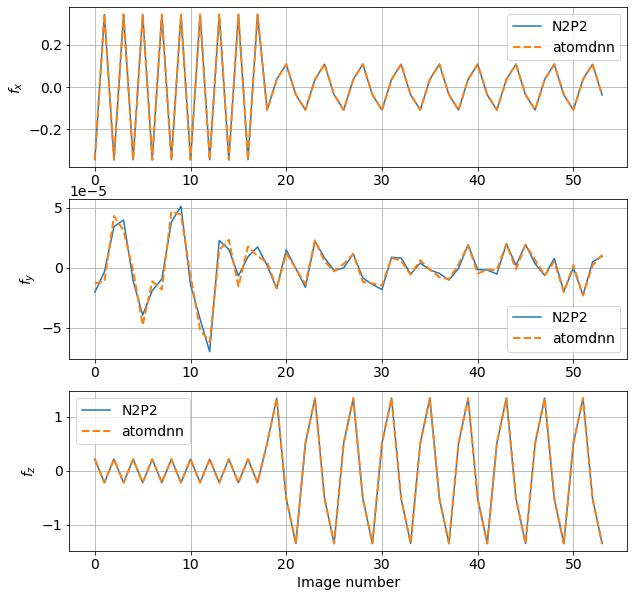

In [9]:
fig,ax = plt.subplots(nrows=3, ncols=1, figsize=(10,10))

ax[0].plot(np.arange(0, fx_n2p2.shape[0], 1), fx_n2p2, label='N2P2')
ax[0].plot(np.arange(0, fx_atomdnn.shape[0], 1), fx_atomdnn, '--', lw=2, label='atomdnn')
ax[0].set_ylabel('$f_x$')
ax[0].grid(True)
ax[0].legend()
ax[1].plot(np.arange(0, fy_n2p2.shape[0], 1), fy_n2p2, label='N2P2')
ax[1].plot(np.arange(0, fy_atomdnn.shape[0], 1), fy_atomdnn, '--', lw=2, label='atomdnn')
ax[1].set_ylabel('$f_y$')
ax[1].grid(True)
ax[1].legend()
ax[2].plot(np.arange(0, fz_n2p2.shape[0], 1), fz_n2p2, label='N2P2')
ax[2].plot(np.arange(0, fz_atomdnn.shape[0], 1), fz_atomdnn, '--', lw=2, label='atomdnn')
ax[2].set_ylabel('$f_z$')
ax[2].grid(True)
ax[2].legend()


plt.xlabel('Image number')
plt.show()

In [9]:

eje = ax[0]

In [10]:
eje.legend()

In [11]:
1.80963891E+00

1.80963891